# Load and Preprocess the Dataset

In [9]:
import pandas as pd
import numpy as np
import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import os


# Define the clean_text function
def clean_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove special characters and numbers
    text = re.sub(r'[^a-z\s]', '', text)
   
    return text

# Load and preprocess the dataset
data = pd.read_csv('IMDB-Dataset.csv', encoding='ISO-8859-1')
data['review'] = data['review'].apply(clean_text)

# Encode sentiment labels (assuming 'positive' and 'negative')
sentiment_mapping = {'positive': 1, 'negative': -1}
data['sentiment'] = data['sentiment'].map(sentiment_mapping)

# Split the data into training and testing sets
X = data['review']
y = data['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Vectorize the Text Data

In [10]:

from sklearn.feature_extraction.text import CountVectorizer

# Initialize the CountVectorizer
vectorizer = CountVectorizer()

# Fit and transform the training data
X_train_vectorized = vectorizer.fit_transform(X_train)

# Transform the testing data
X_test_vectorized = vectorizer.transform(X_test)

# Display the shape of the vectorized data
print("Vectorized Training Data Shape:", X_train_vectorized.shape)
print("Vectorized Testing Data Shape:", X_test_vectorized.shape)




Vectorized Training Data Shape: (40000, 154995)
Vectorized Testing Data Shape: (10000, 154995)


# Visualizations

In [20]:
pip install wordcloud


C:\Users\kvams\AppData\Local\Temp\ipykernel_17720\3113615074.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='sentiment', palette='pastel')


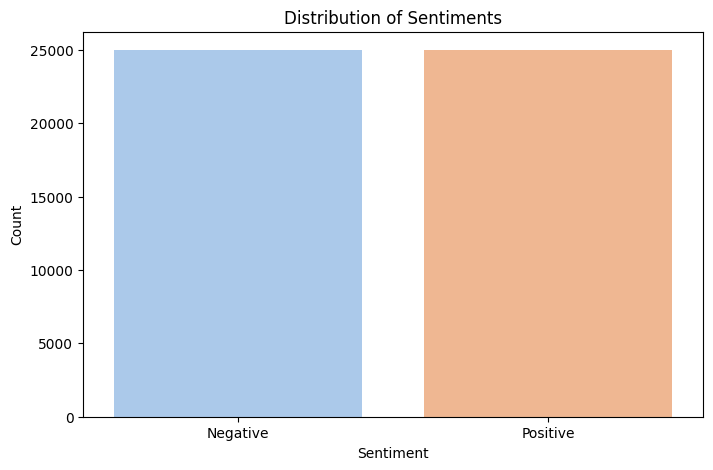

In [21]:
# Distribution of sentiments
plt.figure(figsize=(8, 5))
sns.countplot(data=data, x='sentiment', palette='pastel')
plt.title('Distribution of Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Negative', 'Positive'])
plt.show()


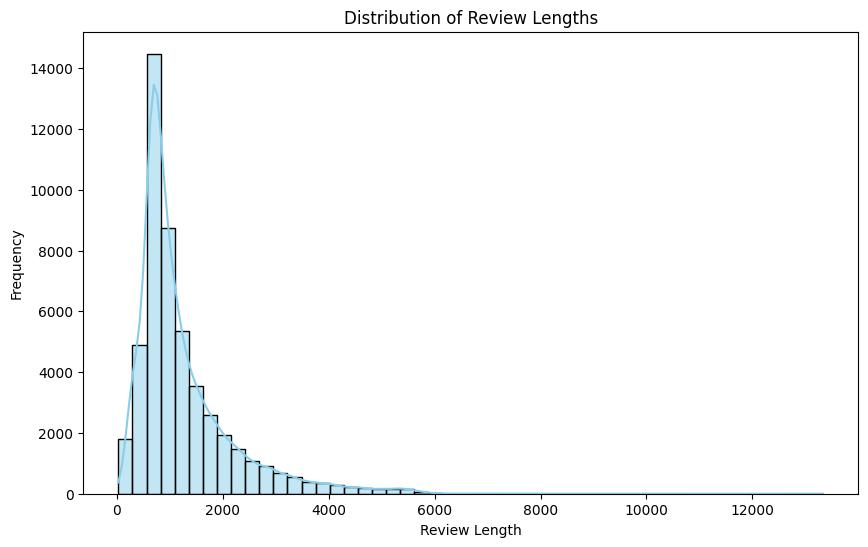

In [22]:
# Calculate the length of each review
data['review_length'] = data['review'].apply(len)

# Plot the distribution of review lengths
plt.figure(figsize=(10, 6))
sns.histplot(data['review_length'], bins=50, kde=True, color='skyblue')
plt.title('Distribution of Review Lengths')
plt.xlabel('Review Length')
plt.ylabel('Frequency')
plt.show()


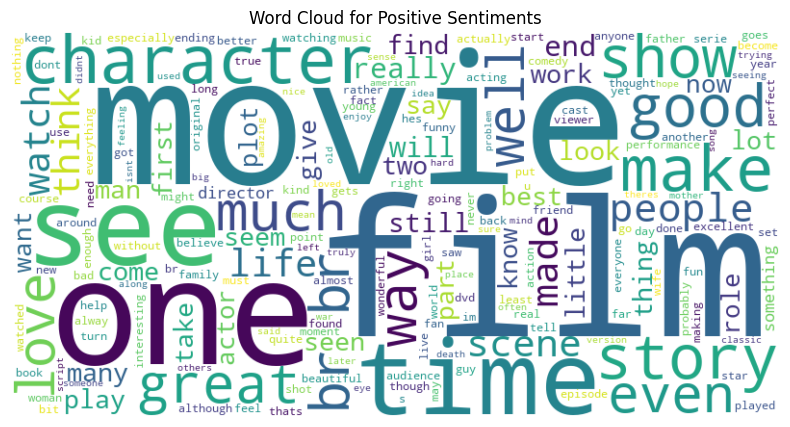

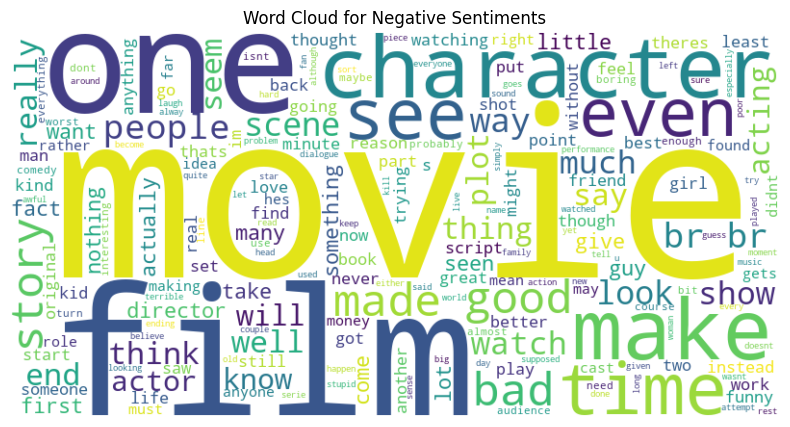

In [23]:
from wordcloud import WordCloud

# Generate a word cloud for positive sentiments
positive_reviews = data[data['sentiment'] == 1]['review']
positive_text = ' '.join(positive_reviews)
wordcloud_positive = WordCloud(width=800, height=400, background_color='white').generate(positive_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Positive Sentiments')
plt.show()

# Generate a word cloud for negative sentiments
negative_reviews = data[data['sentiment'] == -1]['review']
negative_text = ' '.join(negative_reviews)
wordcloud_negative = WordCloud(width=800, height=400, background_color='white').generate(negative_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Negative Sentiments')
plt.show()


C:\Users\kvams\AppData\Local\Temp\ipykernel_17720\722953837.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_positive_words, x='Count', y='Word', palette='viridis')


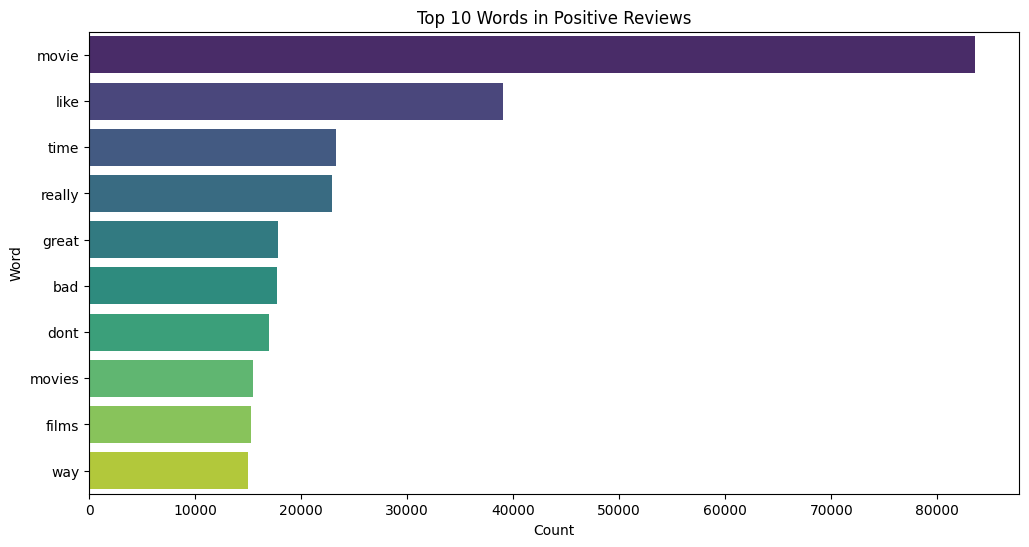

C:\Users\kvams\AppData\Local\Temp\ipykernel_17720\722953837.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_negative_words, x='Count', y='Word', palette='viridis')


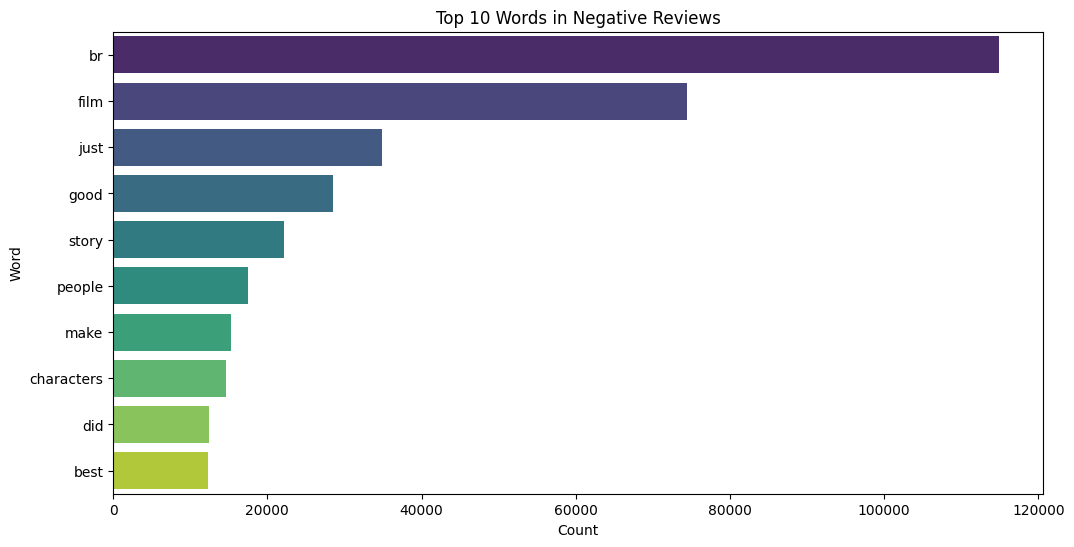

In [24]:
from sklearn.feature_extraction.text import CountVectorizer

# Fit a CountVectorizer on the entire dataset
vectorizer = CountVectorizer(stop_words='english', max_features=1000)
X_vectorized = vectorizer.fit_transform(data['review'])

# Get the sum of each word's frequency
word_counts = X_vectorized.toarray().sum(axis=0)

# Create a DataFrame of words and their counts
words = vectorizer.get_feature_names_out()
word_freq = pd.DataFrame({'Word': words, 'Count': word_counts})

# Get top 10 words for positive and negative sentiments
top_n = 10
top_positive_words = word_freq.loc[data['sentiment'] == 1].nlargest(top_n, 'Count')
top_negative_words = word_freq.loc[data['sentiment'] == -1].nlargest(top_n, 'Count')

# Plot top positive words
plt.figure(figsize=(12, 6))
sns.barplot(data=top_positive_words, x='Count', y='Word', palette='viridis')
plt.title('Top 10 Words in Positive Reviews')
plt.show()

# Plot top negative words
plt.figure(figsize=(12, 6))
sns.barplot(data=top_negative_words, x='Count', y='Word', palette='viridis')
plt.title('Top 10 Words in Negative Reviews')
plt.show()


# Model Training

In [11]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the model
model = MultinomialNB()

# Train the model on the vectorized training data
model.fit(X_train_vectorized, y_train)

# Predict on the test data
y_pred = model.predict(X_test_vectorized)

# Evaluate the model accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy on Test Set:", accuracy)


Model Accuracy on Test Set: 0.8491


Classification Report:

              precision    recall  f1-score   support

    Negative       0.83      0.88      0.85      5000
    Positive       0.87      0.82      0.84      5000

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



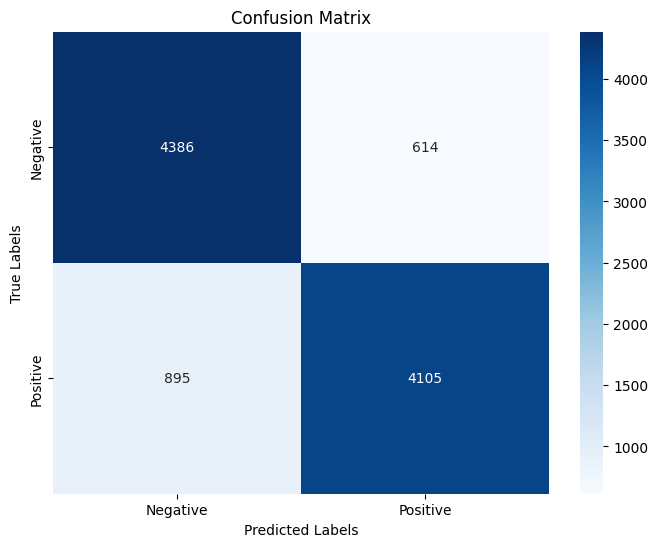

In [12]:
# Classification report and confusion matrix
print("Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=['Negative', 'Positive']))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()



In [19]:
import pickle

# Save the trained model and vectorizer to files
with open('C:/Users/kvams/Documents/IBM INTERNSHIP/models/sentiment_model.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)

with open('C:/Users/kvams/Documents/IBM INTERNSHIP/models/vectorizer.pkl', 'wb') as vectorizer_file:
    pickle.dump(vectorizer, vectorizer_file)



# Define Sentiment Analysis and Suggestions Functions

In [14]:
# Define function for sentiment analysis
def analyze_sentiment(text):
    cleaned_text = clean_text(text)
    vectorized_text = vectorizer.transform([cleaned_text])
    prediction = model.predict(vectorized_text)
    return prediction[0]  # Return the predicted sentiment

# Function to provide suggestions based on sentiment
def provide_suggestions(sentiment, user_input):
    if sentiment == 1:  # Positive sentiment
        suggestions = [
            "Celebrate your positive feelings! Plan a small gathering with friends.",
            "Take some time to reflect on the things going well in your life.",
            "Consider journaling about what makes you happy.",
            "Continue doing activities that bring you joy!"
        ]
    elif sentiment == -1:  # Negative sentiment
        suggestions = [
            "I'm here for you. Talking to someone can really help.",
            "Consider taking a few deep breaths or going for a walk.",
            "Journaling your thoughts might provide some relief.",
            "Don't hesitate to seek support from loved ones or a professional."
        ]
    return "\n".join(suggestions)


# Collect and Log Feedback

In [15]:

# Function to log feedback
def log_feedback(user_input, user_sentiment):
    feedback_df = pd.DataFrame({'review': [user_input], 'sentiment': [user_sentiment]})
    feedback_df.to_csv('C:/Users/kvams/Documents/IBM INTERNSHIP/models/feedback_log.csv', mode='a', header=False, index=False)

# Function to collect feedback from the user
def collect_feedback(user_input, predicted_sentiment):
    user_feedback = input(f"Do you think this sentiment classification '{predicted_sentiment}' is correct? (yes/no): ")
    if user_feedback.lower() == "no":
        user_sentiment = input("How would you classify your sentiment? (positive/negative): ").strip().lower()
        sentiment_mapping = {'positive': 1, 'negative': -1}
        user_sentiment = sentiment_mapping.get(user_sentiment, None)
        if user_sentiment is not None:
            log_feedback(user_input, user_sentiment)
            print("Chatbot: Thank you for your input. I'll learn from this.")


# Run the Chatbot

In [16]:

# Main chatbot loop
def run_chatbot():
    print("Welcome to the Mental Health Support Chatbot!")
    print("You can share your thoughts and feelings with me.")
    print("Type 'exit' to end the conversation.\n")
    
    while True:
        user_input = input("You: ")
        if user_input.lower() == 'exit':
            print("Chatbot: Take care! Remember, it's okay to seek support.")
            break
        
        # Analyze sentiment
        sentiment = analyze_sentiment(user_input)
        sentiment_label = "Positive" if sentiment == 1 else "Negative"
        
        print(f"Chatbot: Your sentiment is classified as '{sentiment_label}'.")

        # Provide suggestions based on sentiment
        suggestion = provide_suggestions(sentiment, user_input)
        print(f"Chatbot: {suggestion}")

        # Collect feedback
        collect_feedback(user_input, sentiment_label)

# Run the chatbot
if __name__ == "__main__":
    run_chatbot()


Welcome to the Mental Health Support Chatbot!
You can share your thoughts and feelings with me.
Type 'exit' to end the conversation.



You:  not good


Chatbot: Your sentiment is classified as 'Negative'.
Chatbot: I'm here for you. Talking to someone can really help.
Consider taking a few deep breaths or going for a walk.
Journaling your thoughts might provide some relief.
Don't hesitate to seek support from loved ones or a professional.


Do you think this sentiment classification 'Negative' is correct? (yes/no):  yes
You:  not bad


Chatbot: Your sentiment is classified as 'Negative'.
Chatbot: I'm here for you. Talking to someone can really help.
Consider taking a few deep breaths or going for a walk.
Journaling your thoughts might provide some relief.
Don't hesitate to seek support from loved ones or a professional.


Do you think this sentiment classification 'Negative' is correct? (yes/no):  no
How would you classify your sentiment? (positive/negative):  positive


Chatbot: Thank you for your input. I'll learn from this.


You:  bad


Chatbot: Your sentiment is classified as 'Negative'.
Chatbot: I'm here for you. Talking to someone can really help.
Consider taking a few deep breaths or going for a walk.
Journaling your thoughts might provide some relief.
Don't hesitate to seek support from loved ones or a professional.


Do you think this sentiment classification 'Negative' is correct? (yes/no):  yes
You:  boring


Chatbot: Your sentiment is classified as 'Negative'.
Chatbot: I'm here for you. Talking to someone can really help.
Consider taking a few deep breaths or going for a walk.
Journaling your thoughts might provide some relief.
Don't hesitate to seek support from loved ones or a professional.


Do you think this sentiment classification 'Negative' is correct? (yes/no):  funny
You:  funny


Chatbot: Your sentiment is classified as 'Negative'.
Chatbot: I'm here for you. Talking to someone can really help.
Consider taking a few deep breaths or going for a walk.
Journaling your thoughts might provide some relief.
Don't hesitate to seek support from loved ones or a professional.


Do you think this sentiment classification 'Negative' is correct? (yes/no):  no
How would you classify your sentiment? (positive/negative):  positive


Chatbot: Thank you for your input. I'll learn from this.


You:  fair


Chatbot: Your sentiment is classified as 'Negative'.
Chatbot: I'm here for you. Talking to someone can really help.
Consider taking a few deep breaths or going for a walk.
Journaling your thoughts might provide some relief.
Don't hesitate to seek support from loved ones or a professional.


Do you think this sentiment classification 'Negative' is correct? (yes/no):  no
How would you classify your sentiment? (positive/negative):  positive


Chatbot: Thank you for your input. I'll learn from this.


You:  well


Chatbot: Your sentiment is classified as 'Positive'.
Chatbot: Celebrate your positive feelings! Plan a small gathering with friends.
Take some time to reflect on the things going well in your life.
Consider journaling about what makes you happy.
Continue doing activities that bring you joy!


Do you think this sentiment classification 'Positive' is correct? (yes/no):  yes
You:  exit


Chatbot: Take care! Remember, it's okay to seek support.
